## Convolution
Convolution이라는 말의 어원은 아래 수식에서 f함수와 g함수를 잘 섞어주는 방법(혹은 operator)으로서 정의 된다.<br>
즉, 2D Image Convolution은 I가 전체 이미지 공간, K가 적용하고자하는 컨볼루션 필터(ex 3x3) 모양이 된다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
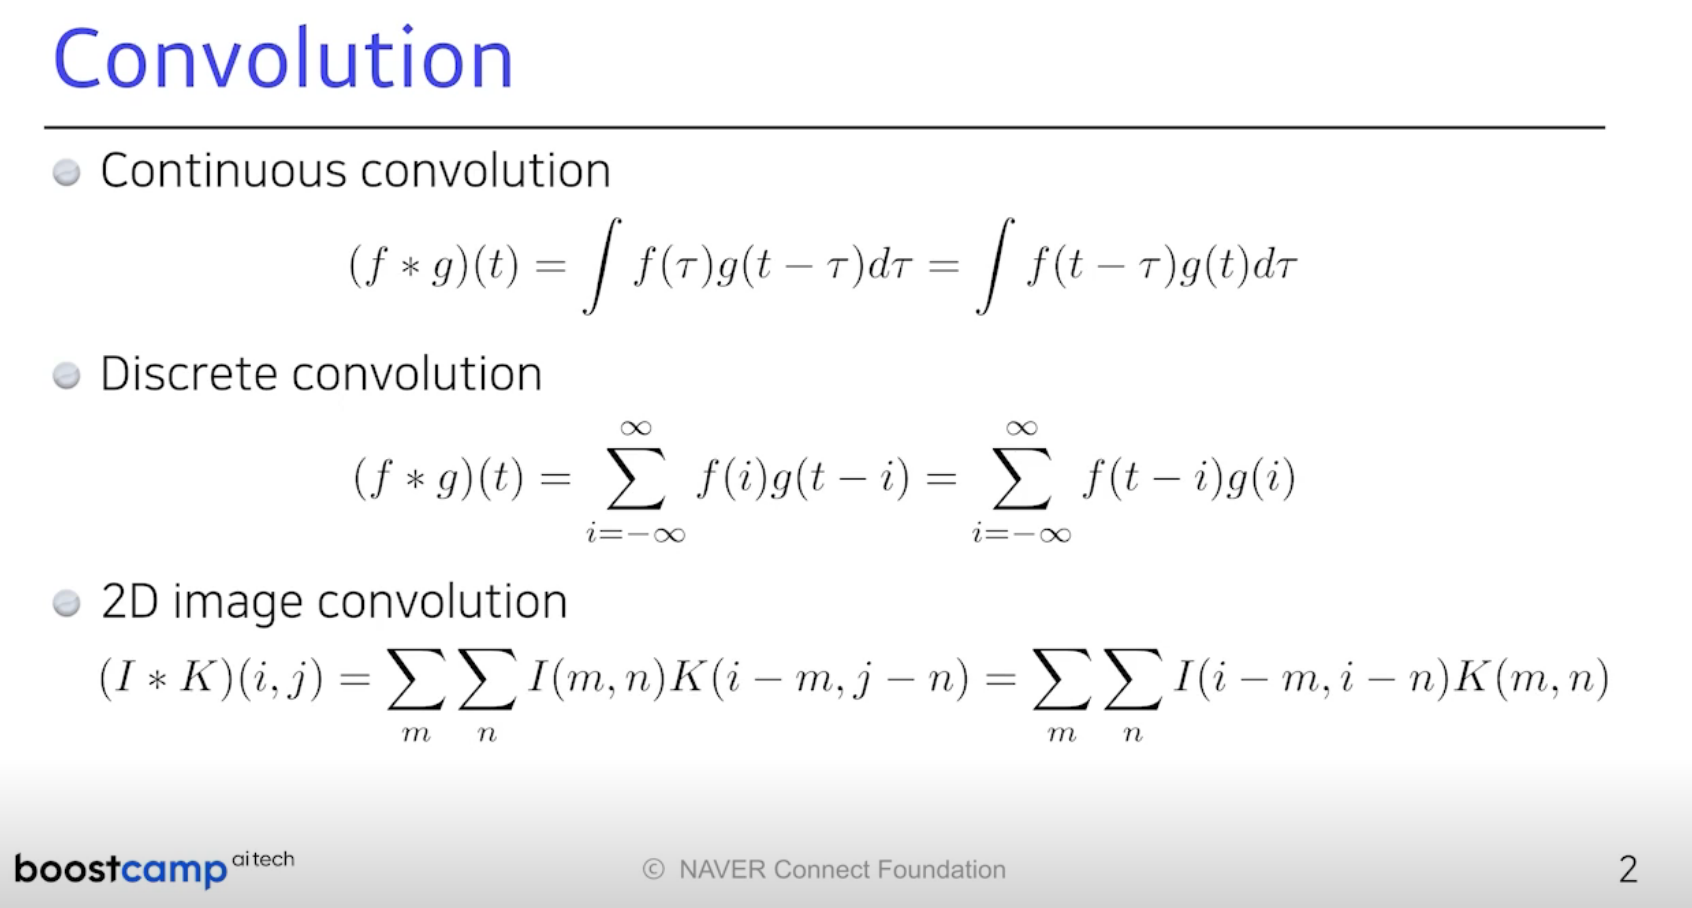

### Convoltion 예시
3x3필터로 7x7을 훑으면, 5x5가 나온다<br>
<div>
    <img src=attachment:image.png width=800>
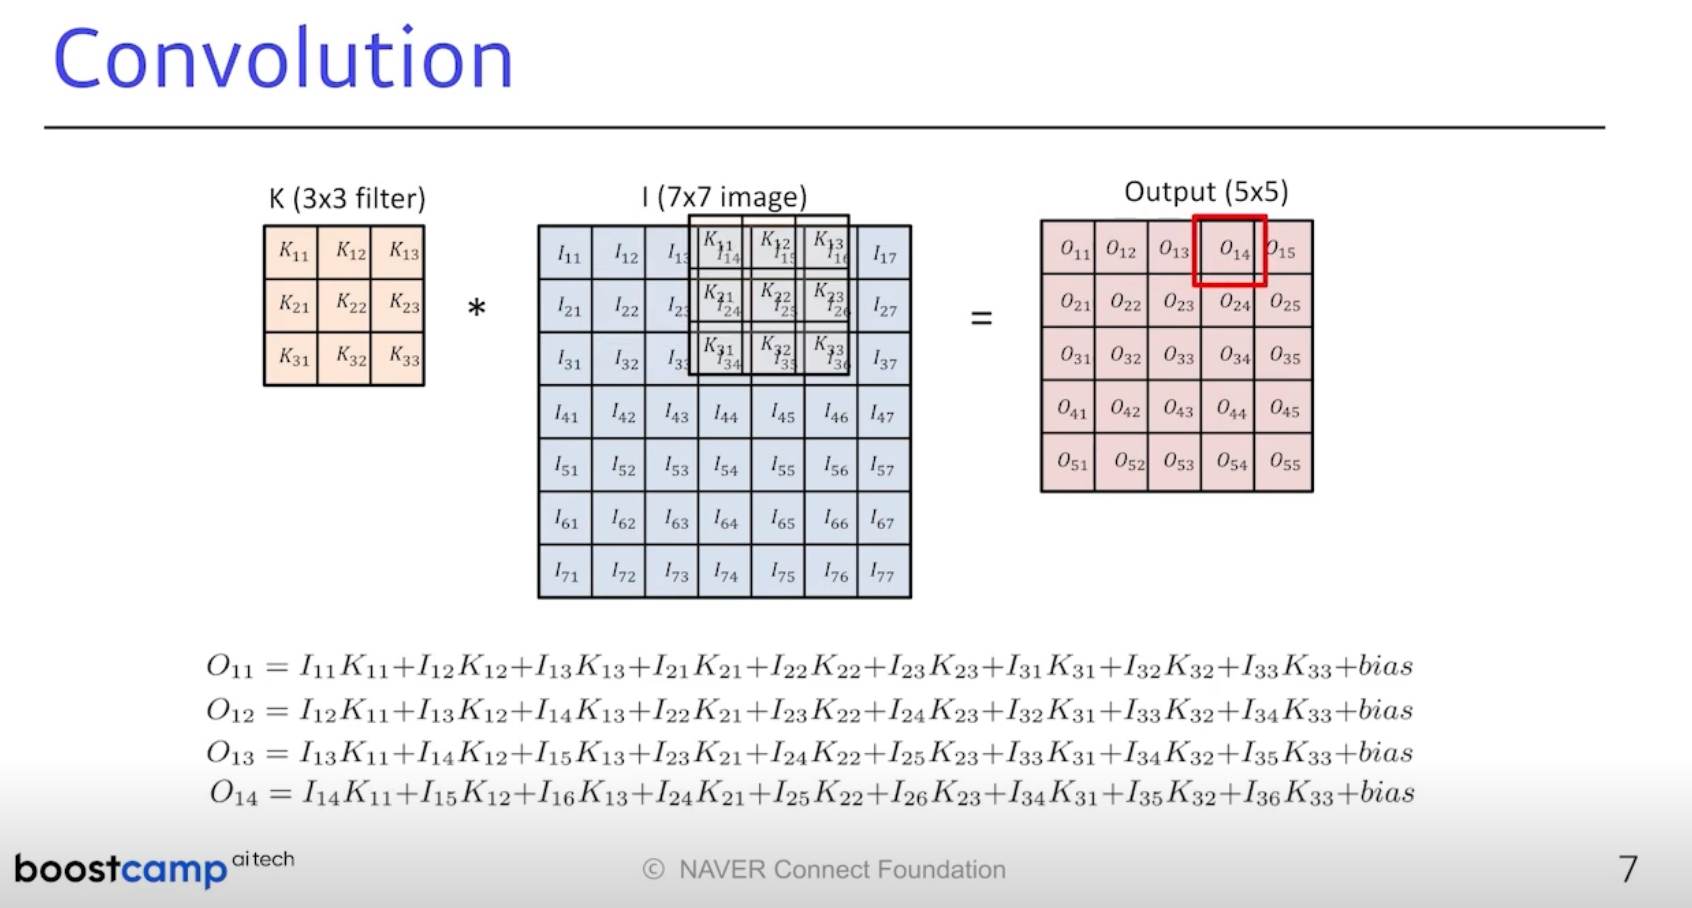

### Convolution의 의미
Convolution의 필터에 따라 결과가 Blur가 될수도 있고, 강조(Emboss)가 될 수 도 있고, Outline(경계선)이 될 수도 있다.<br>
<div>
    <img src=attachment:image.png width=800>
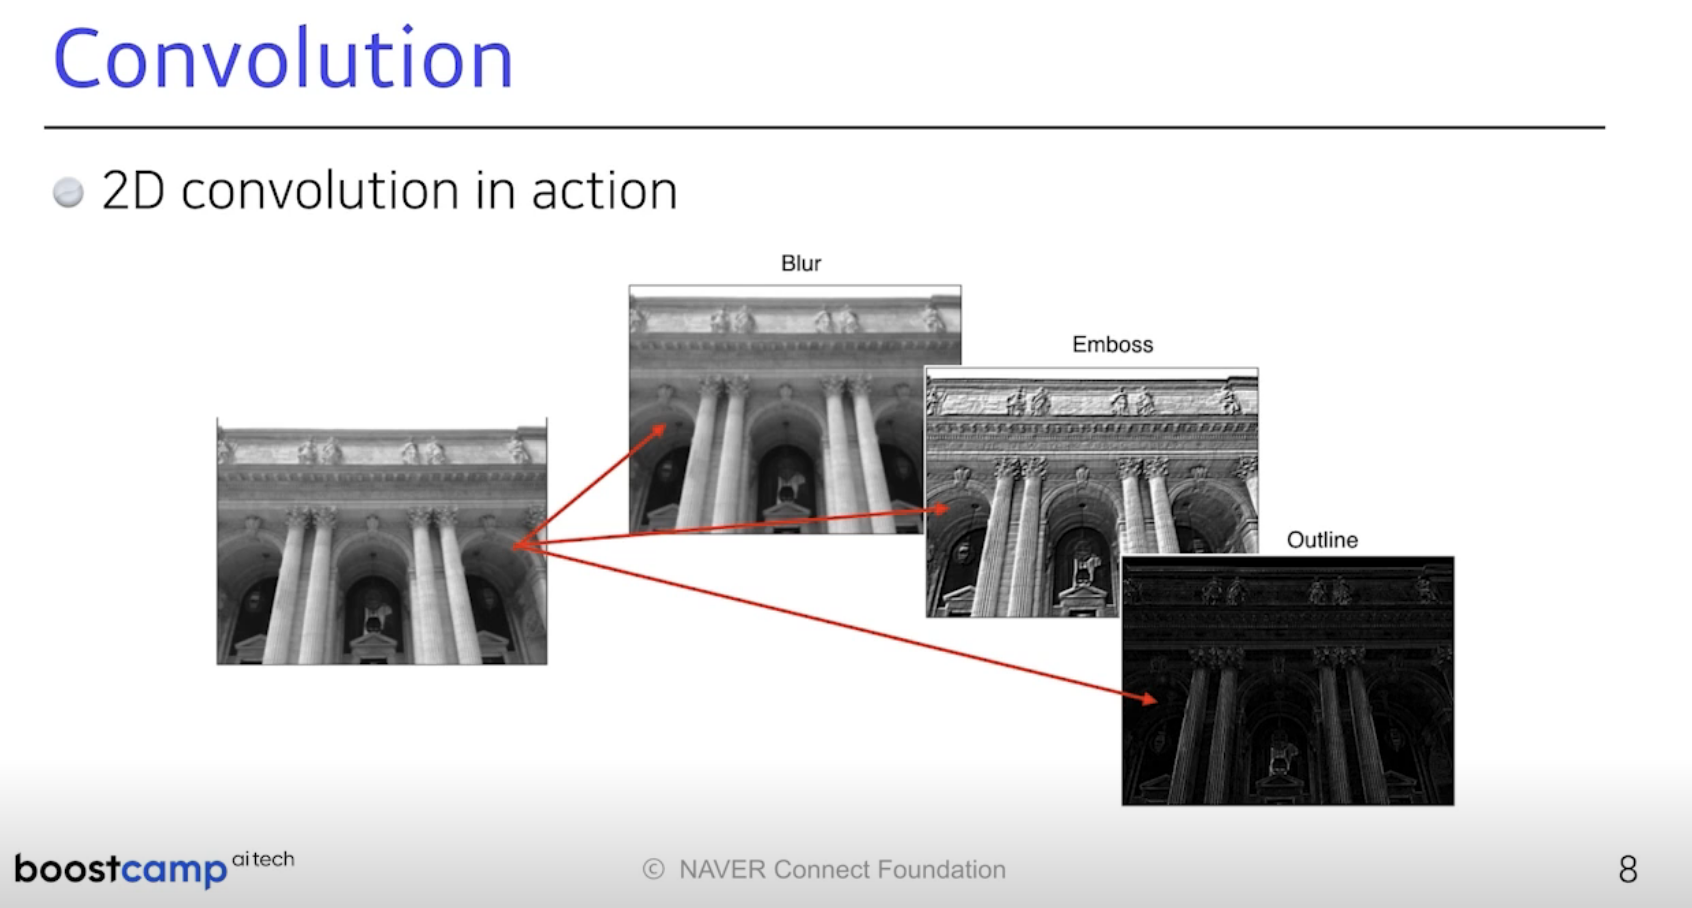

### RGB Image Convolution
주로 2D RGB 이미지를 콘볼루션 한다. 4개의 5x5x3 필터를 사용하는 경우 -> 4개의 피처이미지가 나온다.<br>
이미지의 크기는 처음 32에서 5를 필터로 썼으니, 32-5+1=28이 나온다.<br>
<div>
    <img src=attachment:image.png width=800>

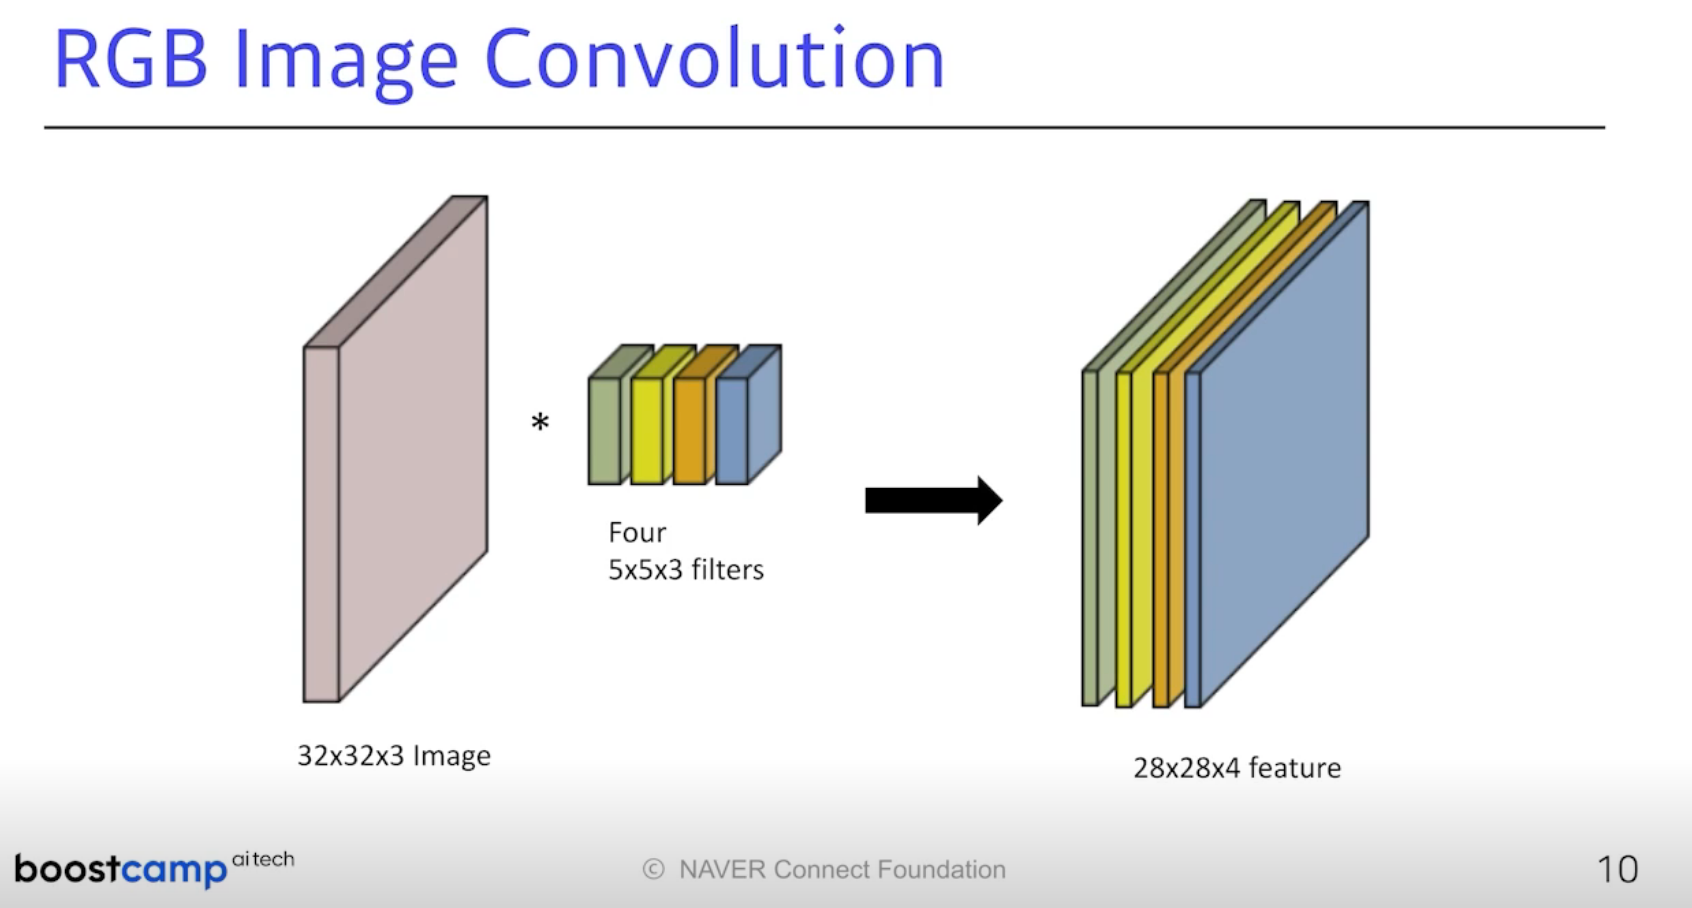

### Stack of Convolutions
-> 콘볼루션을 여러번 할수 있다. CONV를 할 때는 non-linear function(여기선 RELU)를 사용한다.<br>
이때, 항상 집중해서 봐야할 것은 이 연산에 필요한 파라미터의 숫자를 봐야 한다.<br>
1. 처음 32x32x3에서 28x28x4로 CONV 연산에 필요한 파라미터의 숫자는 4개의 5x5x3 필터가 필요하기 때문에, 5x5x4x3=300 개의 파라미터가 필요하다.<br>
2. 두번째는 10개의 5x5x4가 필요 -> 5x5x4x10=1000개의 파라미터가 필요하다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>

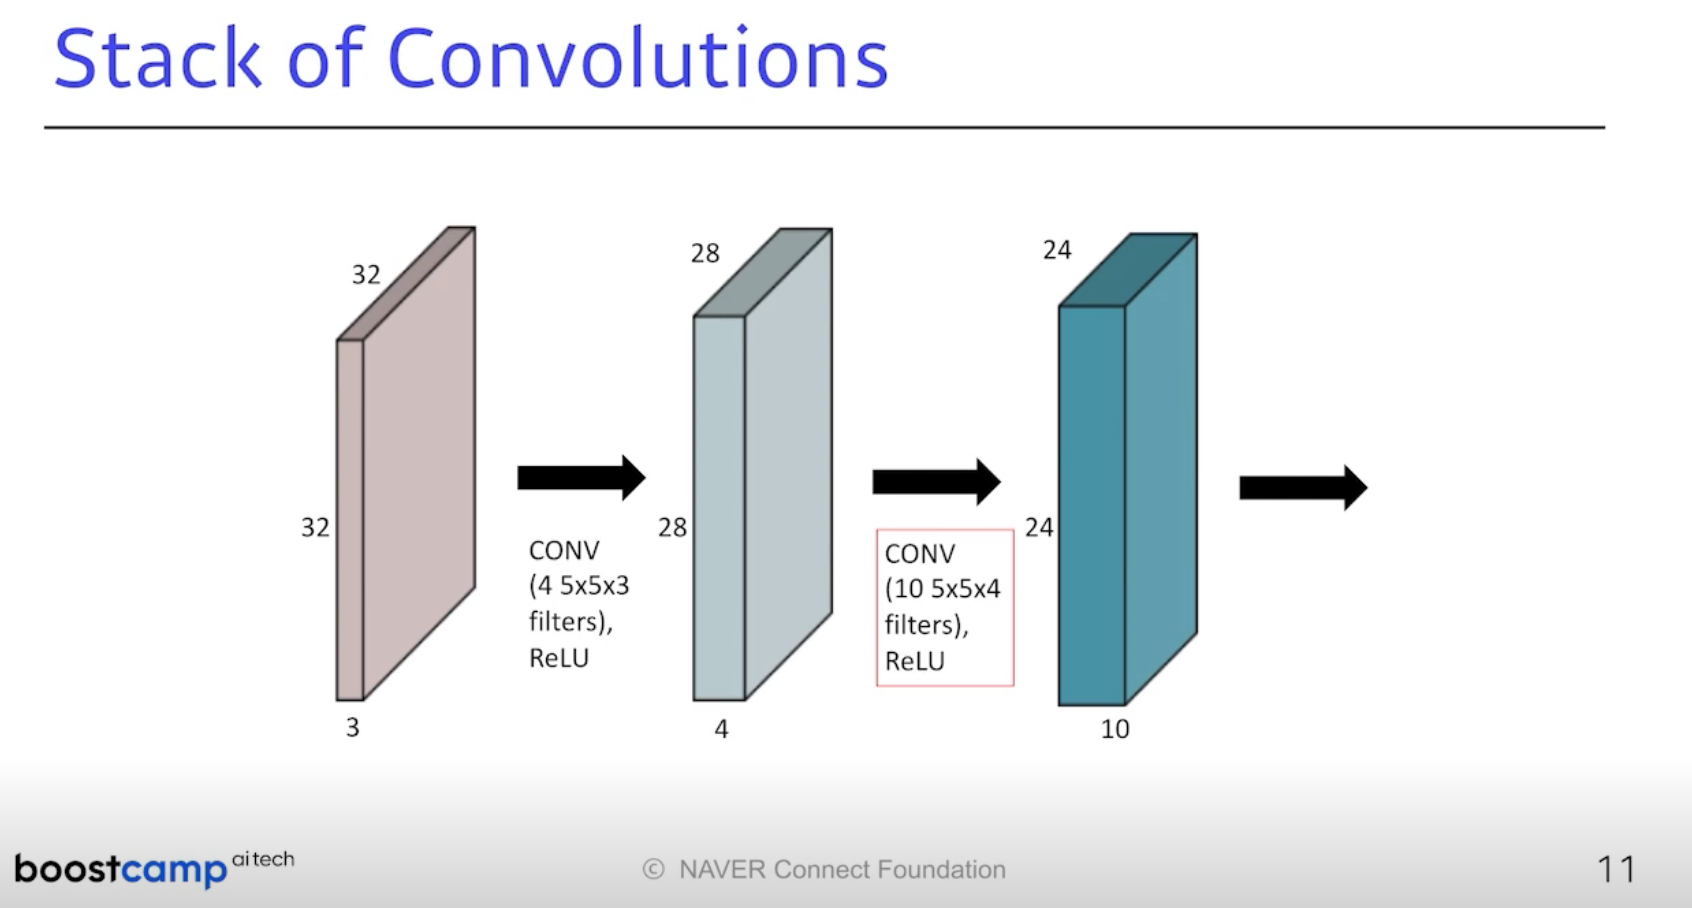

## Convolutional Neural Networks
머신러닝에 일반적으로 알려진 사실은, 학습 하고자 하는 모델의 파라미터가 많을 수록 Genralization 성능이 떨어진다는 것이다.<br>
바꿔말하면, 학습에서 성능이 좋아도, 실제 데이터에서 성능이 안좋다는 얘기이다.<br>
결국, CNN의 발전하는 방향이, 모델을 최대한 깊게 만드는 동시에 파라미터 개수를 줄이는데 집중한다.<br>
-> 그래서 모델을 봤을 때, 레이어 별로 몇개의 파라미터가 쓰이는지 봐야한다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
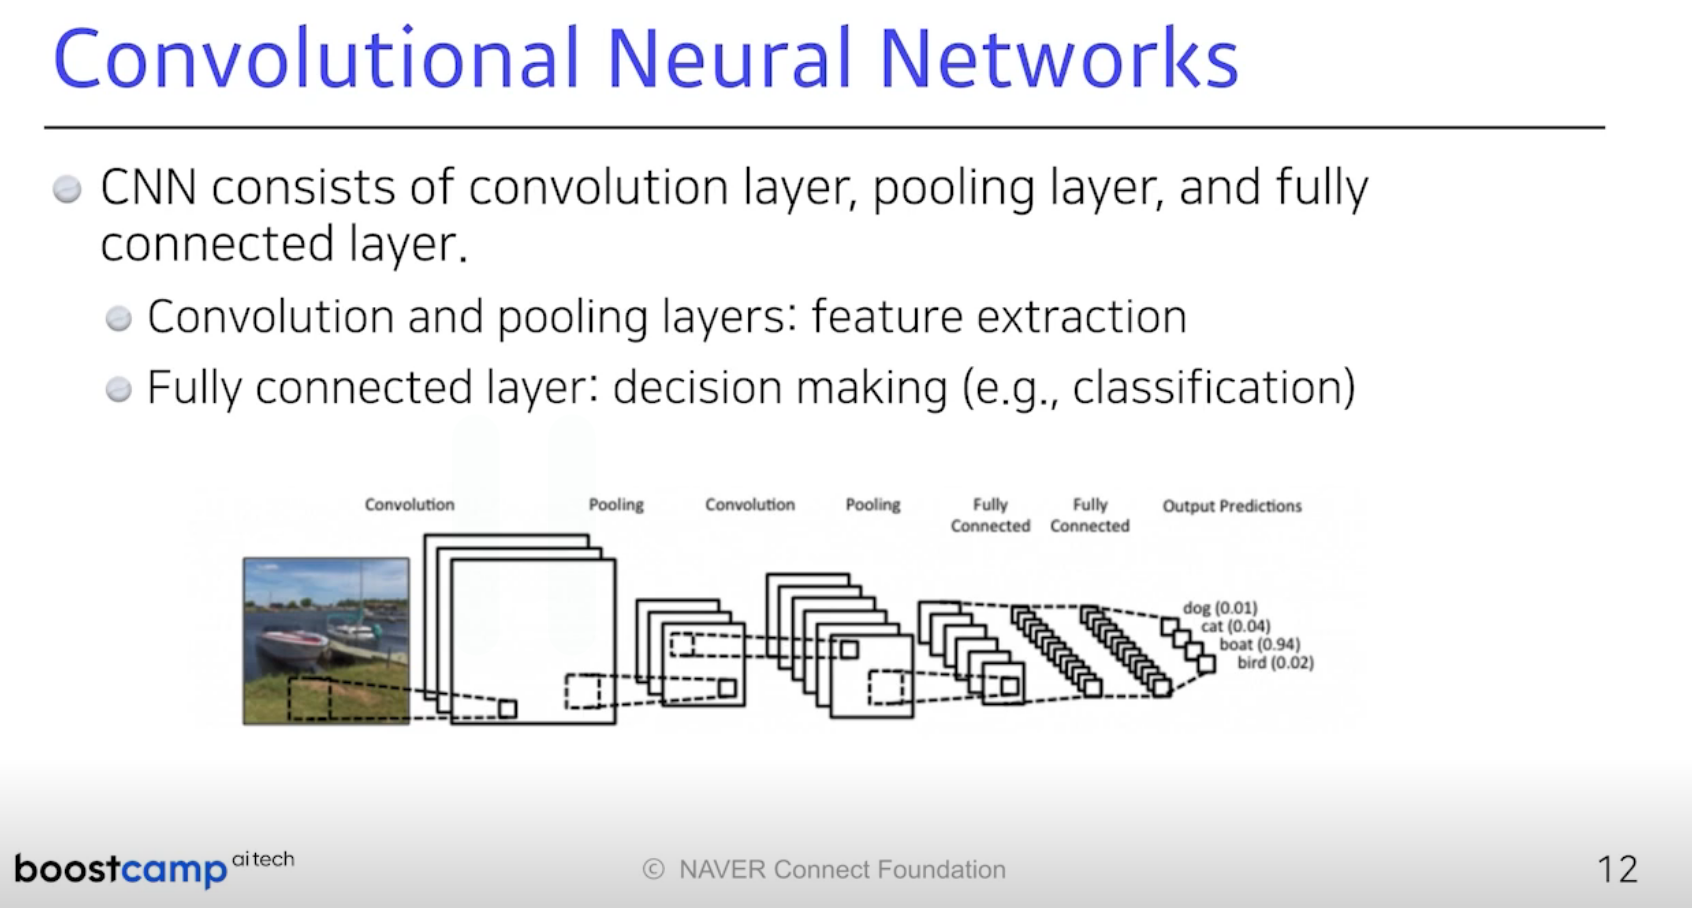

### Stride
필터가 움직이는 칸수. Stride=1 이면 필터가 1픽셀씩 이동. Stride=2이면 필터가 2픽셀씩 이동><br>
<div>
    <img src=attachment:image.png width=800>
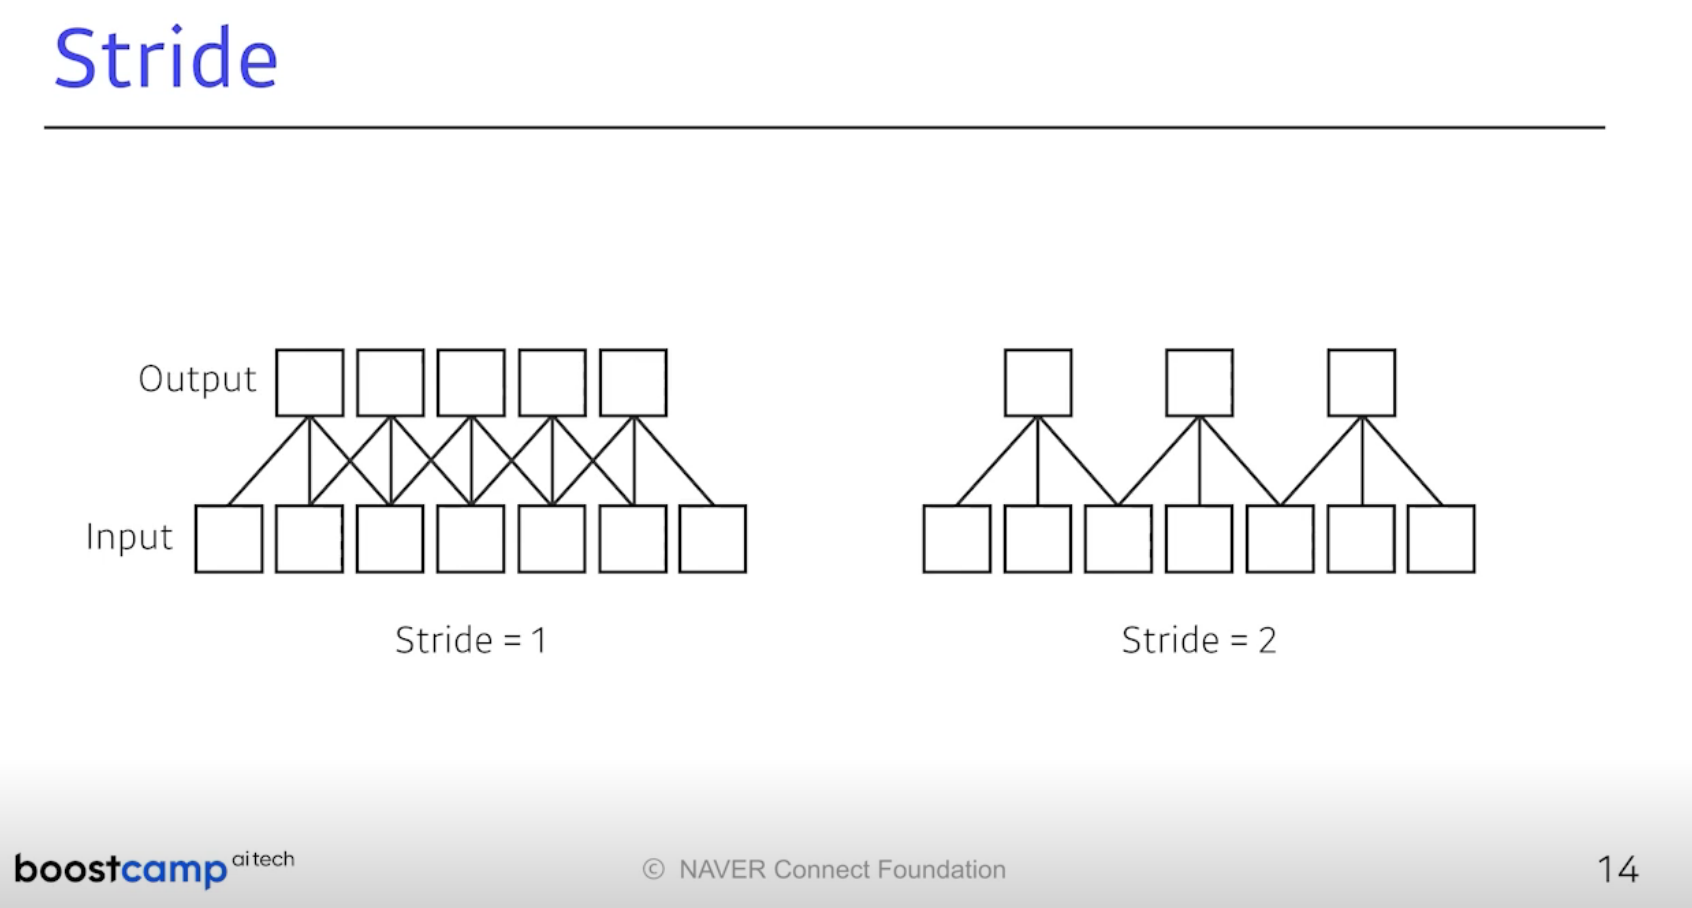

### Padding
패딩은 입력된 이미지 주변에 칸을 채워넣어서, 테두리도 인식할 수 있도록 하는 것이다.<br>
보통 0으로 채워넣기 때문에 Zero padding이라고도 한다.<br>
<div>
    <img src=attachment:image.png width=800>

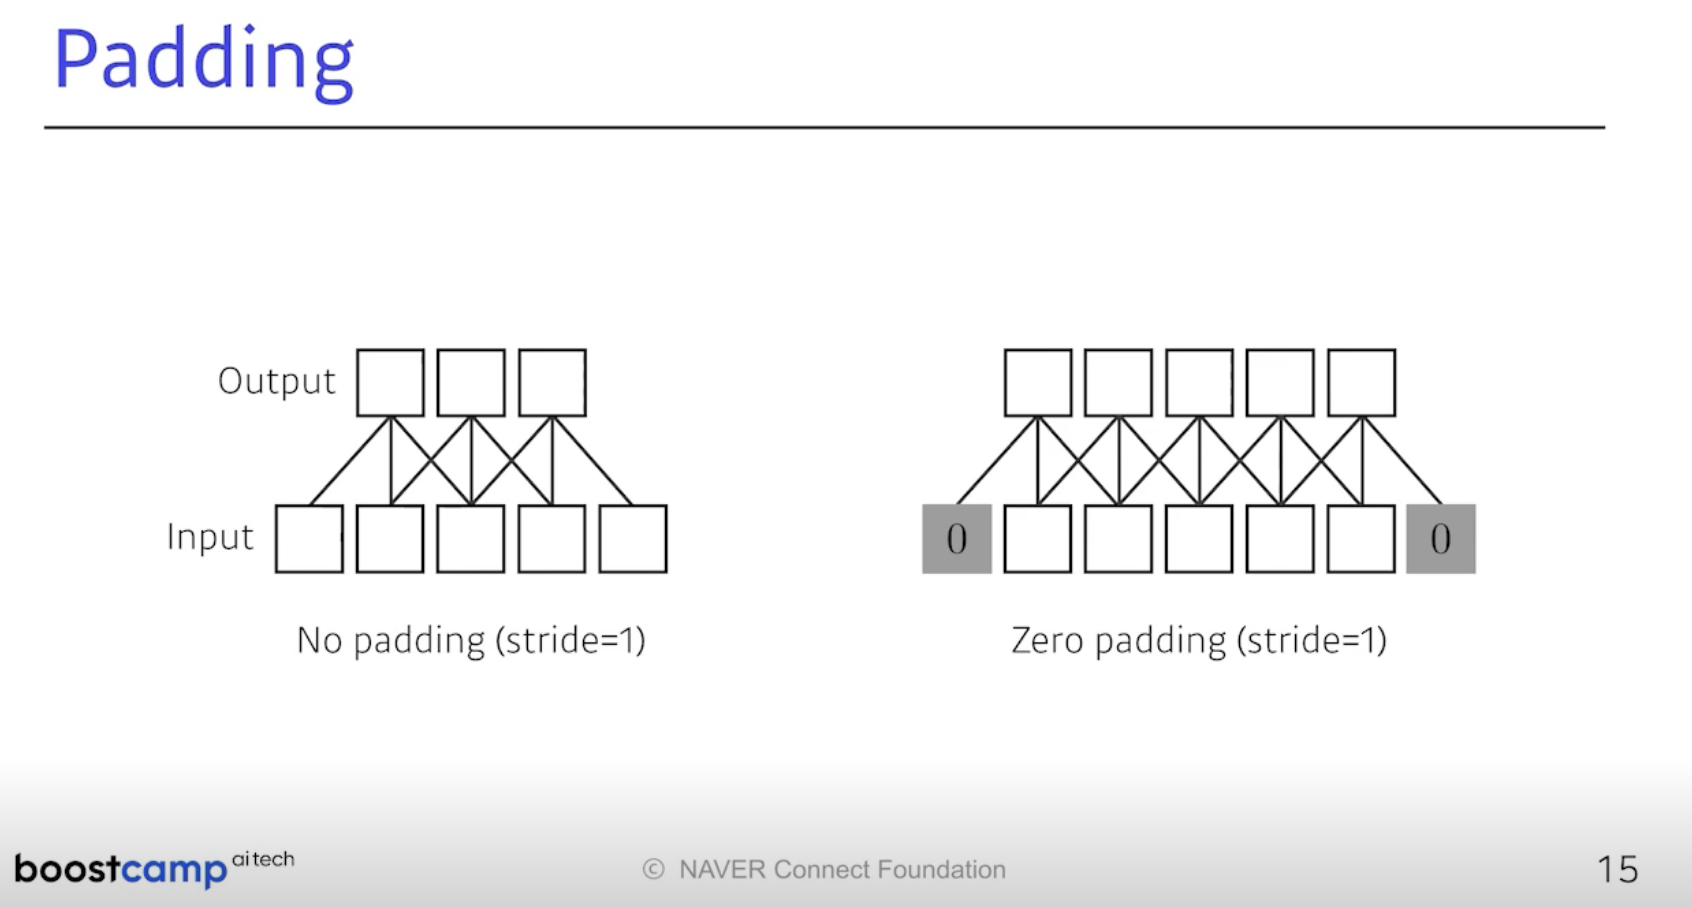

### Stride, Padding 예시
아래 빨간박스부분이 해당 필터 연산의 Stride와 Padding<br>
<div>
    <img src=attachment:image.png width=800>
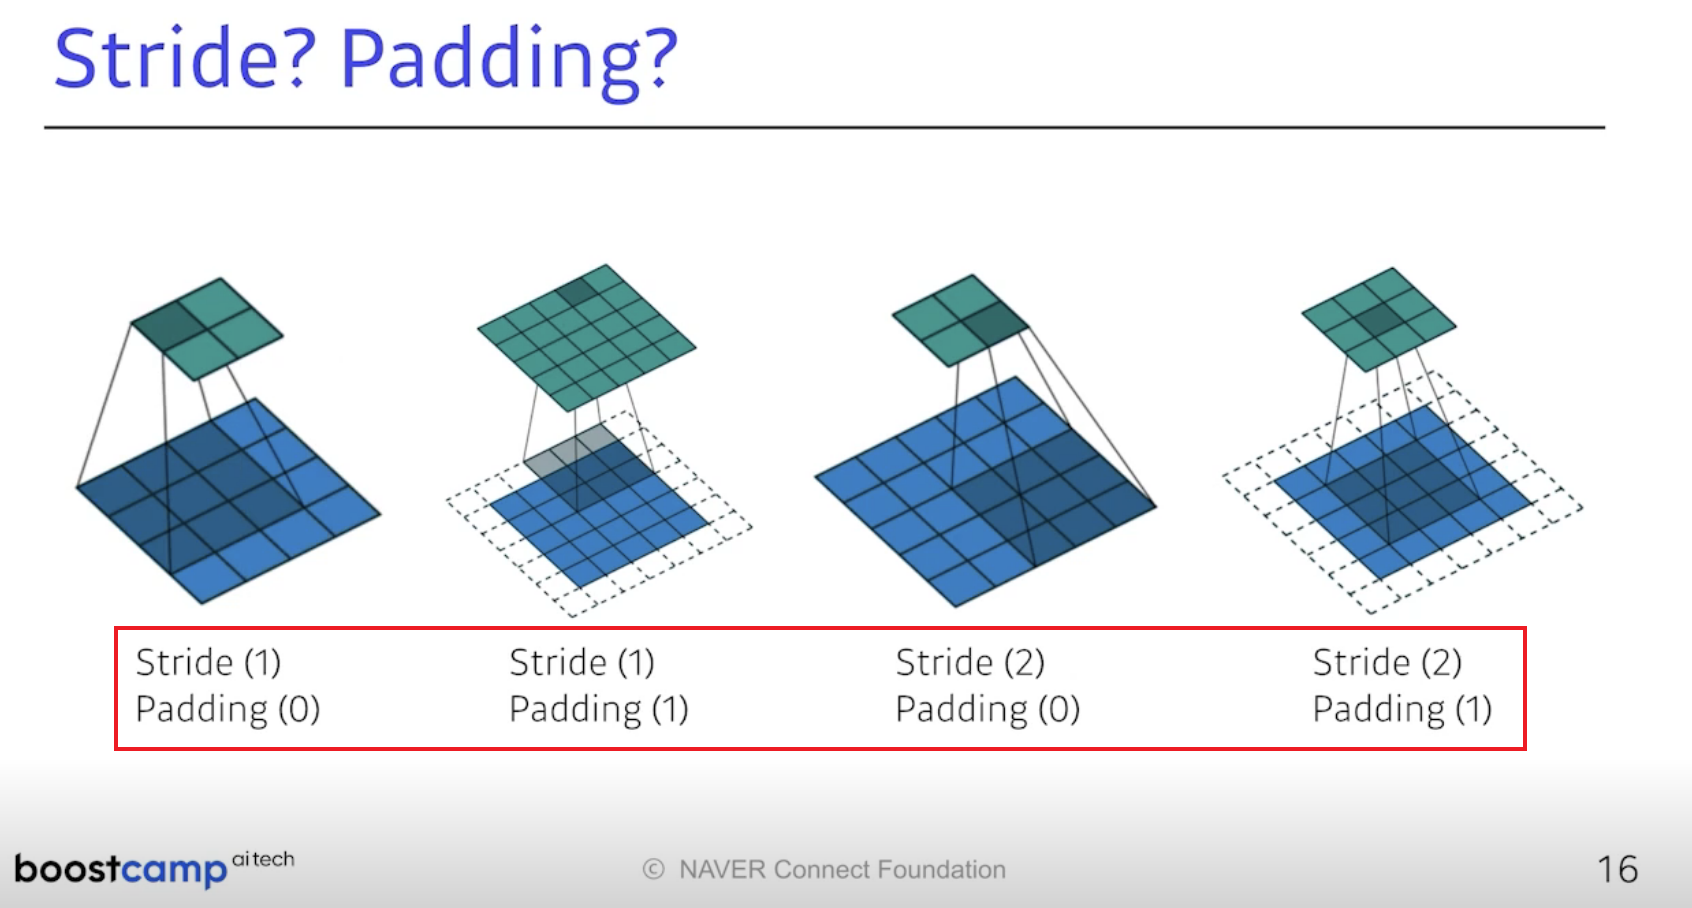

### Convolution Arithmetic(콘볼루션 계산)
파라미터 계산 실습을 해보자.<br>
필터는 3x3x128이고 결과 64개짜리 채널이므로, 파라미터의 개수는 3x3x128x64 이다.<br>
<div>
    <img src=attachment:image-2.png width=800>
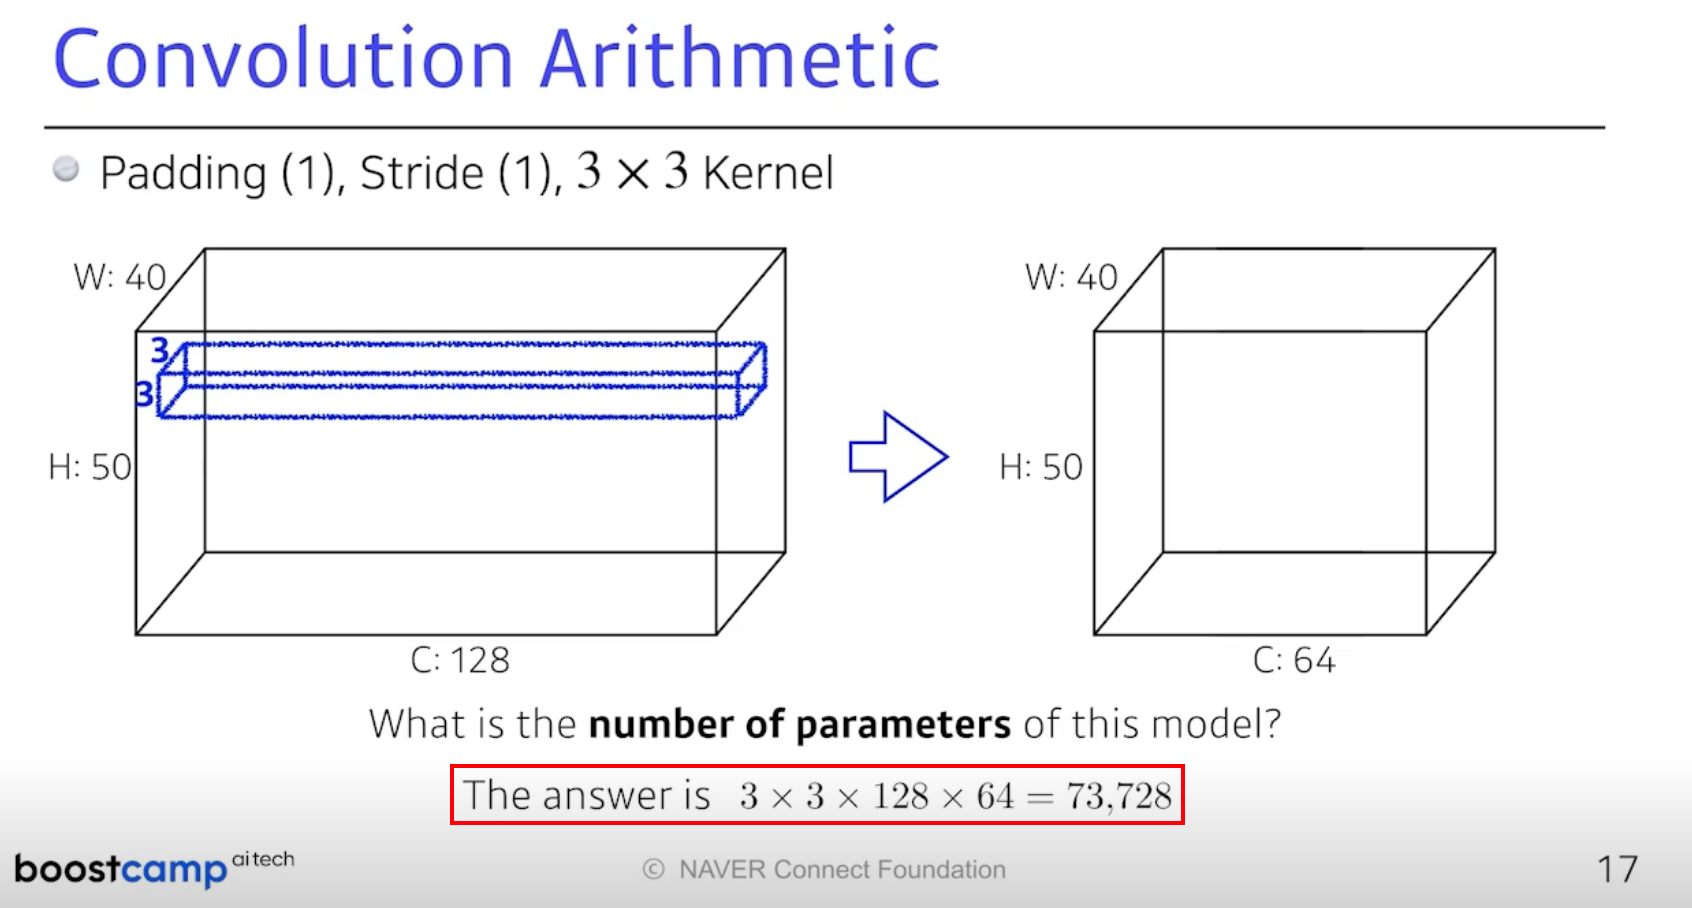

In [5]:
print(f"{2048*2048*4:,}")

16,777,216


### Exercise
알렉스넷의 파라미터 개수 훑어보기<br>
처음은 11x11x3짜리가 다음에 48채널로 가고, 그런 필터가 2개이므로 -> 11x11x3x48x2 = 35k 이다.<br>
두번째는 5x5x48x128x2=307k(2개니까)이고, 3번째는 3x3x128x192x4=884k(총 4개니까)이다.<br>
4번째는 3x3x192x192x2=663k, 5번째는 3x3x192x128x2=442k,<br>
그 다음부터는 Dense 레이어이다. 덴스 레이어는 Fully Connected 레이어이고, 파라미터 개수는 Input의 파라미터 개수와, Output의 파라미터 개수를 곱한 값이다.<br>
처음 덴스 레이어는 13x13x128x2048x4=177M(4번 연산), 2번째는 2048x2048x4=16M, 3번째는 2048x1000x2=4M 이다.<br>
<br>
<div>
    <img src=attachment:image.png width=800>
</div>

-> 머신러닝 트렌드의 방향이 파라미터 개수를 줄이는 것(성능이 잘나온다고 밝혀진 방향)이므로, CONV 레이어들을 깊게 쌓고, Dense 레이어(Fully Connected)를 줄여나가는 방향이다.
    
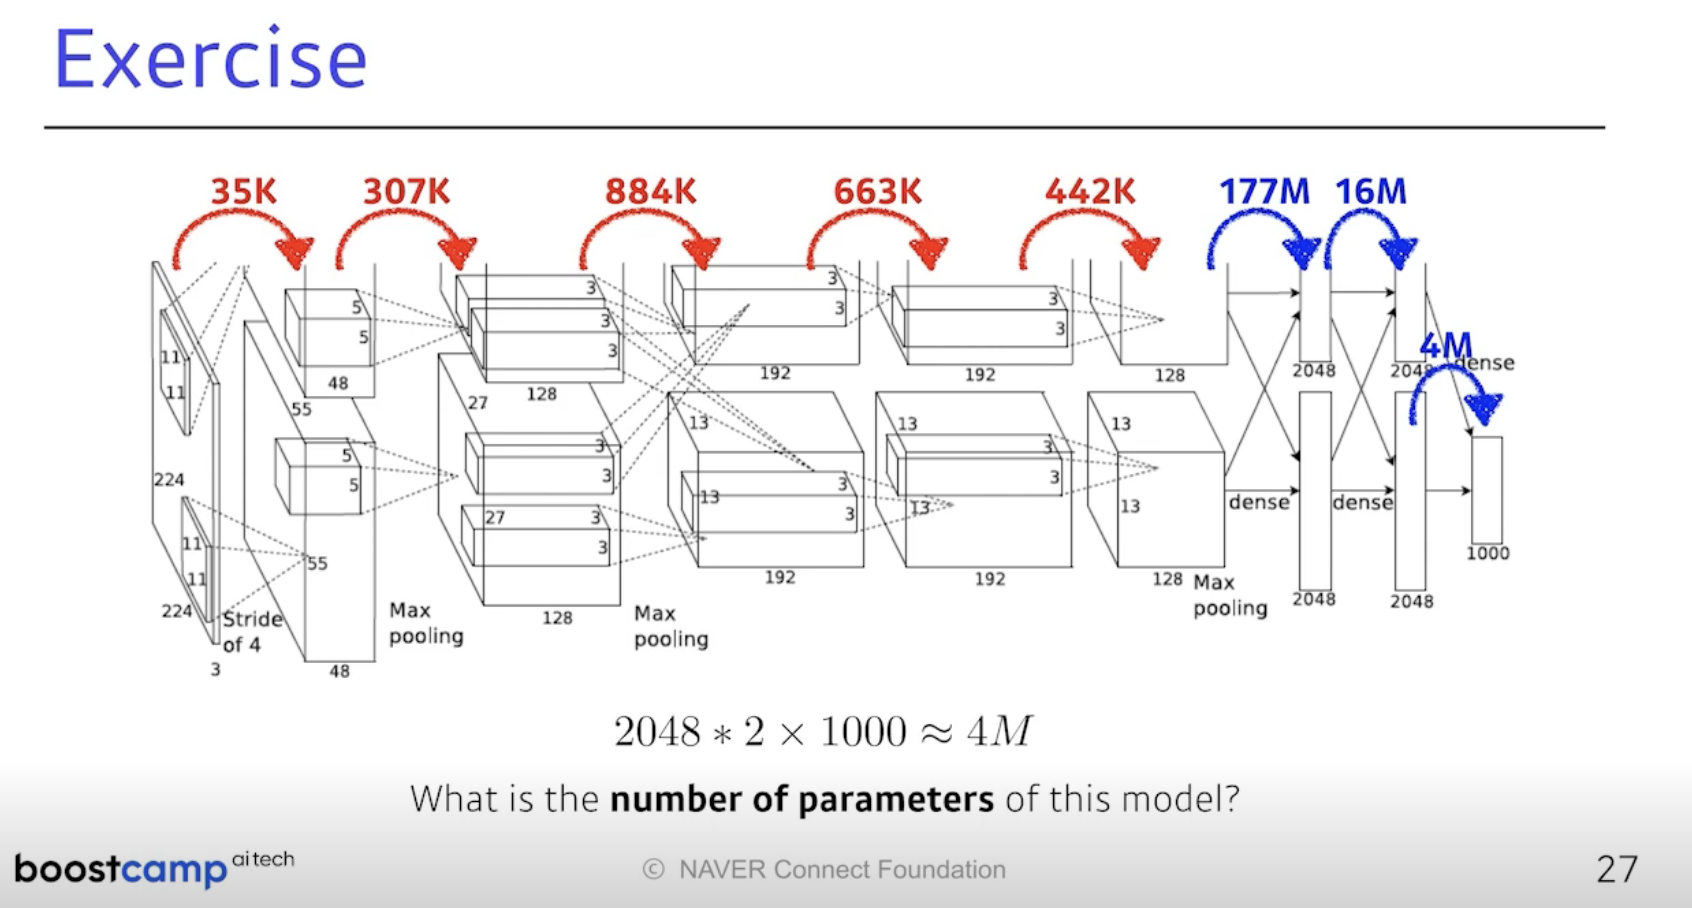

### 1x1 Convolution
위와 같은 머신러닝의 방향에서 사용되는게 1x1 Convolution이다.<br>
이것을 왜 할까?<br>

    1. Dimension reduction (차원 축소)
    2. CONV 깊이 증가와 동시에, 파라미터 개수 감소. ex) bottleneck architecture

<div>
    <img src=attachment:image.png width=800>
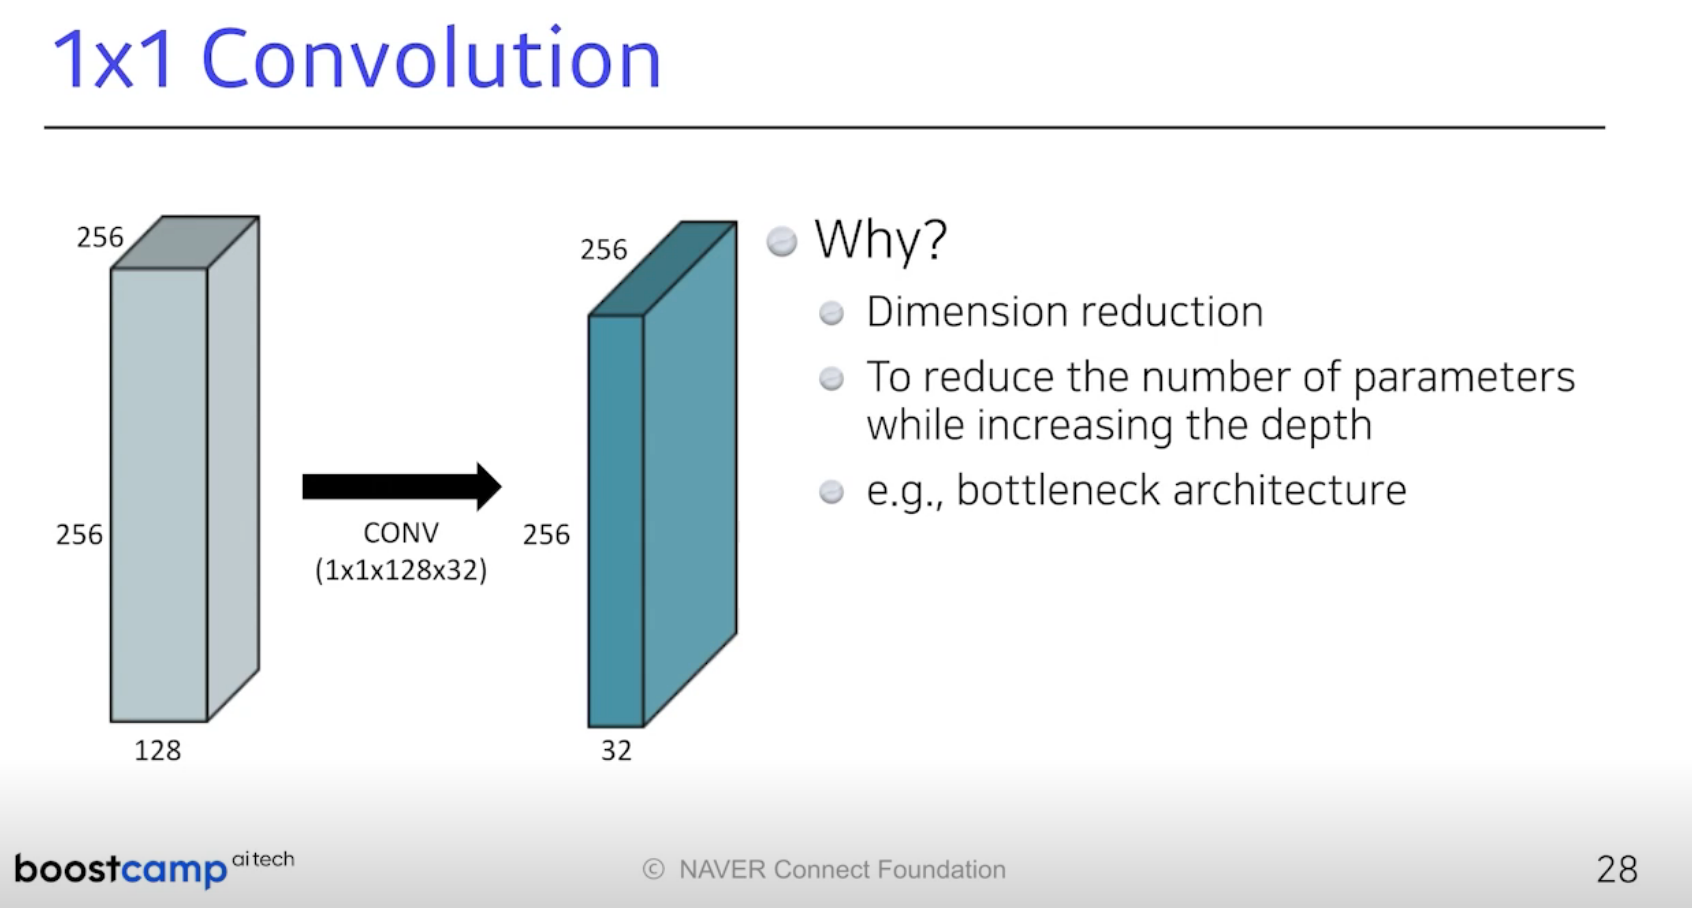